In [157]:
#https://www.kaggle.com/pierra/credit-card-dataset-svm-classification
#datset - https://www.kaggle.com/mlg-ulb/creditcardfraud/home

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
dataset = pd.read_csv('creditcard.csv')

In [7]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df_fraud = dataset[dataset['Class'] == 1]

df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Text(0.5, 1.0, 'Scatter Plot of all Frauds with Time and Amount')

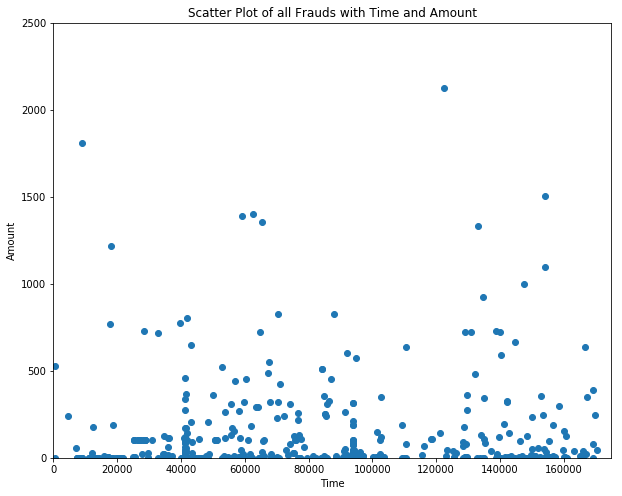

In [11]:
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.xlim(0, 175000)
plt.ylim(0, 2500)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Scatter Plot of all Frauds with Time and Amount')

In [18]:
# The above scatter plot shows that most of the frauds were for smaller amount (<1000)

In [12]:
#Finding total no. of frauds in the actual dataset
fraud_count = dataset[dataset['Class'] == 1].shape[0]

print('There were total {} frauds in a total of {} transactions.'.format(fraud_count, dataset.shape[0]))

There were total 492 frauds in a total of 284807 transactions.


Text(0.5, 1.0, 'Heatmap Correlation')

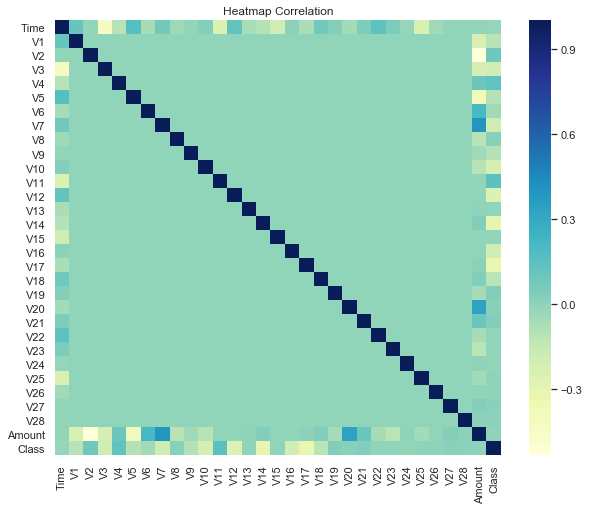

In [34]:
#Correlation
corr = dataset.corr()

sns.heatmap(corr, cmap="YlGnBu")
sns.set(font_scale=1,style='white')

plt.title('Heatmap Correlation')

In [35]:
#Finding features having largest correlation with Class
corr_rank = corr['Class'].sort_values(ascending=False)

corr_rank

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [21]:
print('Dataset has total {} records. hence we will split around 160000 recrds for training and the rest for testing our model.'.format(dataset.shape[0]))

df_train_bal = dataset[:160000]

Dataset has total 284807 records. hence we will split around 160000 recrds for training and the rest for testing our model.


### Creating balanced training dataset

In [15]:
#Creating a balanced dataset with comparable counts of both the outcome classes 0 and 1
df_train_bal_0 = df_train_bal[dataset['Class'] == 0]
df_train_bal_1 = df_train_bal[dataset['Class'] == 1]

#Sample method returns a random sample of items from an axis of object.
#Selected 300 non-fraud transactions as its comparable to records in fraud dataframe i.e. approx 356
df_train_bal_0 = df_train_bal_0.sample(300)

#FInal trainign dataset with balanced records, Randomize the dataset
df_train_bal = df_train_bal_0.append(df_train_bal_1).sample(frac=1)


c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
print('Balanced dataset has total of {} records.'.format(df_train_bal.shape[0]))

Balanced dataset has total of 160000 records.


In [18]:
X_train_bal = df_train_bal.drop(['Time', 'Class'], axis=1)
y_train_bal = df_train_bal['Class']

### Creating test dataset

In [19]:
#Considering from 160000 as first 159999 records are used for training
df_test_bal = dataset[160000:]

X_test_bal = df_test_bal.drop(['Time', 'Class'], axis=1)
y_test_bal = df_test_bal['Class']

print('Balanced testing dataset has {} records'.format(X_test_bal.shape[0]))

Balanced testing dataset has 124807 records


In [27]:
#SVM Implementation
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train_bal, y_train_bal)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred = classifier.predict(X_test_bal)

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_bal, y_pred)

array([[114347,  10324],
       [    12,    124]], dtype=int64)

In [32]:
actual_frauds = y_test_bal[y_test_bal == 1].shape[0]
predicted_frauds = y_pred[y_pred == 1].shape[0]

print('{} were detected out of {} actual frauds.'.format(predicted_frauds, actual_frauds))
print('Probability of detection is {}'.format((predicted_frauds/actual_frauds)*100))

10448 were detected out of 136 actual frauds.
Probability of detection is 7682.352941176471


### Training Dataset based on Rank

In [41]:
#Selecting balanced training dataset using first 10 ranks of correleated features
X_train_rank = X_train_bal[list(corr_rank[1:11].index)]

X_train_rank.head()

,V11,V4,V2,V21,V19,V20,V8,V27,V28,Amount
151103,0.765354,3.787548,0.024881,0.010865,-1.912563,-0.368014,0.699136,0.007738,-0.068841,33.76
139835,-0.399624,0.498130,0.870890,-0.162374,0.613268,0.008190,-0.064257,0.126700,0.174444,1.98
117382,1.687057,-1.493072,-0.910869,-0.395306,-0.052931,-0.234115,-0.156653,0.014995,0.009881,49.20
103889,-0.733599,-0.208882,1.402340,-0.321359,0.189759,0.319306,-0.119698,0.226721,0.154244,12.99
74496,5.763189,5.177819,2.397041,-0.175273,2.465195,0.073164,0.437157,1.197895,0.378187,0.83


In [42]:
X_test_rank = X_test_bal[list(corr_rank[1:11].index)]

In [43]:
#Prediciting using ranked dataset
#y_train_bal remains the same as last case

classifier.fit(X_train_rank, y_train_bal)

y_pred_rank = classifier.predict(X_test_rank)

In [44]:
confusion_matrix(y_test_bal, y_pred_rank)

array([[118980,   5691],
       [    22,    114]], dtype=int64)

In [156]:
#predictions worsens after using ranked features

### Re-balanced class weigh

In [45]:
classifier_mod = SVC(kernel='linear', class_weight={0:0.6, 1:0.4})

classifier_mod.fit(X_train_bal, y_train_bal)

SVC(C=1.0, cache_size=200, class_weight={0: 0.6, 1: 0.4}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
y_pred_weighted = classifier_mod.predict(X_test_bal)

In [47]:
confusion_matrix(y_test_bal, y_pred_weighted)

array([[116603,   8068],
       [    12,    124]], dtype=int64)

In [49]:
predicted_frauds_weighted = y_pred_weighted[y_pred_weighted == 1].shape[0]

print('{} were detected out of {} total frauds.'.format(predicted_frauds_weighted, actual_frauds))
print('Probability of detection is {}'.format((predicted_frauds_weighted/actual_frauds)*100))

8192 were detected out of 136 total frauds.
Probability of detection is 6023.529411764705


In [50]:
y_pred_weighted[y_pred_weighted == 1]

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
# TODO : Incorrect proediction 